1. Implement the model of Usher et al. (1999) and show that it reproduces the results shown in Figure 3. Explain why coupling is important for model performance.

2. How does the network’s performance change in unstable environments (where the target and distractor change) or in environments where the target probability is low? How does coupling influence performance in these different environments?

3. Discuss how this account of norepinephrine and locus coeruleus might be related to work on pupillary correlates of change detection in dynamic environments (Nassar et al., 2012). See Aston-Jones & Cohen (2005, p. 421) for a review of evidence that pupil diameter tracks locus coeruleus activity.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
class lc_network():
    def __init__(self):
        self.weights = np.zeros(250)
        self.integration_val = 0
        self.threshold = 0
        self.previous_net_input = 0
        
    def step(self, activity):
        fire = False
        if self.integration > self.threshold:
            fire = True
            self.integration = 0
        net_input = tau*sum(np.multiply(activity, self.weights)) + (1 - tau)*self.previous_net_input
        gain = net_input*self.weights
        previous_net_input = net_input
        

            

In [89]:
sns.set_theme(style="darkgrid")

In [36]:
bin_width = 3
 
spikes = np.array([0.8, 1.3, 6, 6.2, 7, 10, 11.2, 15.7, 16])
triggers = np.array([0, 5, 15])
counts = [0] * bin_width
 
for i in range(triggers.size - 1):
    tmpCounts, tmpEdges = np.histogram(spikes, bins = bin_width, range = (triggers[i], triggers[i+1]))
    counts = counts + tmpCounts

In [37]:
threshold = 0.8
trial_recs = []
for i in range(100):
    trial = []
    for j in range(-700, 600):
        current_neuron_volt = np.random.rand(250)
        counts_at_time_j = sum([1 for fire in current_neuron_volt if fire > threshold])

array([5, 2, 0])

<IPython.core.display.Javascript object>


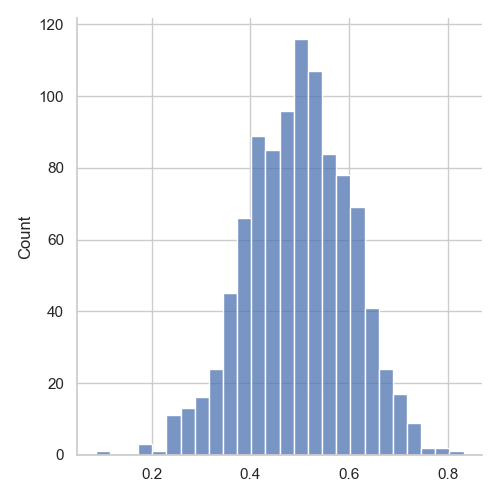

In [87]:
noise = np.random.normal(0.5, 0.1,size=1000)
sns.displot(noise)

plt.show()

In [83]:
# record the average value of the response unit, over time
trials = [[] for i in range(100)]
for trial in trials:
    

array([-0.15694935,  0.55897839, -0.14842459,  1.80167535,  1.01044413,
        1.99522546,  1.91801237,  1.88820368,  2.70541825,  2.5261553 ])

<IPython.core.display.Javascript object>


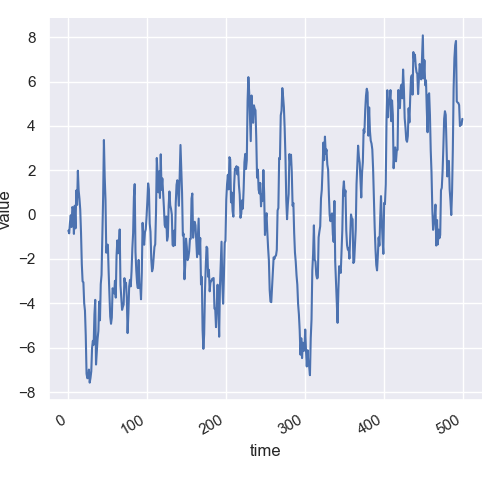

In [19]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

<IPython.core.display.Javascript object>


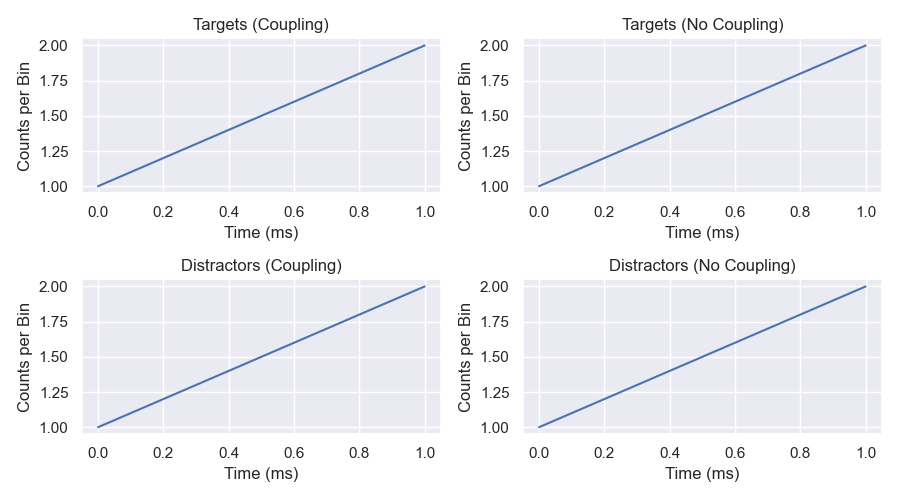

In [20]:
def lc_plot(ax, title, coupling=True, target=True):
    ax.plot([1, 2])
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Counts per Bin')
    ax.set_title(title)
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(9,5))
lc_plot(ax1, "Targets (Coupling)")
lc_plot(ax2,"Targets (No Coupling)")
lc_plot(ax3, "Distractors (Coupling)")
lc_plot(ax4, "Distractors (No Coupling)")
plt.tight_layout()